In [1]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip instll opencv-python

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "instll" - maybe you meant "install"



In [2]:
import os
import cv2  #opency-pyton 모듈 설치
import glob
import json
import shutil
import random
import ultralytics
import torch
import yaml
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
from ultralytics import YOLO
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageFolder
from ultralytics.utils.plotting import Annotator
%matplotlib inline

In [20]:
for i in tqdm([1,2,3,4,5,6,7,8,9,0]):
    time.sleep(1)


100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


In [3]:
data_root = r'E:\project\New_Data'
file_root = rf'{data_root}\Image'
project_name = 'fall_detection'
print(file_root)
train_root = rf'{data_root}\train'
valid_root = rf'{data_root}\valid'
test_root = rf'{data_root}\test'
cls_list = ['Normal', 'Fall']
cls_filename_list = ['N', 'BY', 'FY', 'SY']

E:\project\New_Data\Image


In [28]:
file_list = glob.glob(f'{file_root}\\annotations\\*.txt')
file_name_list = list(set([i.split('\\')[-1].split('_')[0] for i in file_list]))


In [18]:
for cls in cls_filename_list:    
    file_list = glob.glob(f'{file_root}\\labels\\*_{cls}_*.txt')
    file_group_list = list(set([i.split('\\')[-1].split('_')[0] for i in file_list]))
    print(file_group_list)
    print(len(file_group_list))
    random.shuffle(file_group_list)
    test_ratio = 0.1
    num_file = len(file_group_list)

    test_list = file_group_list[:int(num_file*test_ratio)]
    valid_list = file_group_list[int(num_file*test_ratio):int(num_file*test_ratio)*2]
    train_list = file_group_list[int(num_file*test_ratio)*2:]


    for i in tqdm(train_list):
        for src in glob.glob(f'{file_root}\\labels\\{i}_*.txt'):
            label_name = src.split('\\')[-1]
            shutil.copyfile(src, f'{train_root}\\labels\\{label_name}')
            img_name = label_name.split('//')[-1].replace('txt', 'jpg')
            img_path = f'{file_root}\\images\\{img_name}'
            shutil.copyfile(img_path, f'{train_root}\\images\\{img_name}')

    for i in tqdm(test_list):
        for src in glob.glob(f'{file_root}\\labels\\{i}_*.txt'):
            label_name = src.split('\\')[-1]
            shutil.copyfile(src, f'{test_root}\\labels\\{label_name}')
            img_name = label_name.split('//')[-1].replace('txt', 'jpg')
            img_path = f'{file_root}\\images\\{img_name}'
            shutil.copyfile(img_path, f'{test_root}\\images\\{img_name}')

    for i in tqdm(valid_list):
        for src in glob.glob(f'{file_root}\\labels\\{i}_*.txt'):
            label_name = src.split('\\')[-1]
            shutil.copyfile(src, f'{valid_root}\\labels\\{label_name}')
            img_name = label_name.split('//')[-1].replace('txt', 'jpg')
            img_path = f'{file_root}\\images\\{img_name}'
            shutil.copyfile(img_path, f'{valid_root}\\images\\{img_name}')

# with open(f'{data_root}\\train_list', 'w') as f:
#     f.write(train_list)
# with open(f'{data_root}\\test_list', 'w') as f:
#     f.write(test_list)
# with open(f'{data_root}\\valid_list', 'w') as f:
#     f.write(valid_list)

['00569', '01789', '01120', '00762', '02319', '01660', '02285', '01280', '02561', '00647', '01910', '00823', '00039', '01400', '01803', '01178', '02409', '01425', '02231', '01418', '00874', '01562', '00990', '01488', '02502', '01576', '02197', '01198', '02448', '01281', '01475', '01154', '02069', '02077', '01116', '02347', '01421', '00991', '02061', '02255', '02089', '01235', '01694', '00778', '02360', '02293', '01398', '00013', '01946', '01319', '01382', '01023', '02299', '01073', '02057', '01194', '02583', '00623', '00827', '00965', '01584', '01799', '02413', '02006', '00970', '02105', '02573', '00748', '01009', '02072', '00509', '00870', '02314', '01181', '02619', '00658', '01566', '02611', '02522', '01871', '00811', '02596', '01856', '01914', '01090', '02025', '01687', '00009', '00695', '00002', '01955', '02465', '01167', '00807', '02523', '00905', '02380', '01096', '00822', '01991', '02417', '00713', '00491', '00292', '01723', '01082', '01020', '00030', '01163', '01875', '01899', 

100%|██████████| 52/52 [02:17<00:00,  2.64s/it]


['02923', '01945', '01196', '00819', '00616', '00915', '00848', '02052', '02132', '00283', '02890', '01184', '02903', '01396', '01550', '02512', '01634', '02564', '00524', '00897', '01460', '01706', '02100', '02388', '02900', '00765', '00809', '01293', '02261', '01354', '00651', '01623', '00668', '01317', '00891', '00999', '02544', '00858', '01754', '01971', '01295', '00787', '01406', '02424', '02957', '01277', '01936', '02694', '01726', '00969', '00489', '02104', '00580', '01161', '00629', '00783', '02871', '01188', '00689', '01870', '01590', '02408', '01299', '01647', '02873', '00800', '01788', '00705', '02938', '02911', '00317', '01146', '02632', '02128', '00684', '00050', '00740', '00860', '01134', '01204', '01373', '00936', '01449', '01169', '02017', '02367', '01207', '01998', '00563', '00482', '02084', '02116', '01095', '00478', '02623', '00568', '02375', '00637', '01215', '01702', '02379', '00446', '01011', '00728', '00444', '00768', '00921', '01211', '01466', '00291', '02431', 

100%|██████████| 17/17 [00:49<00:00,  2.91s/it]


['02566', '02246', '01978', '02580', '01657', '02621', '02902', '01896', '02218', '02275', '01401', '00518', '00679', '01274', '02154', '01464', '02793', '01496', '00570', '02812', '02000', '02499', '00782', '02336', '01267', '00731', '01156', '02134', '01133', '02861', '02238', '02762', '02958', '01883', '01519', '01700', '02735', '00851', '01592', '02736', '01800', '00836', '01479', '02138', '01804', '02449', '02700', '00898', '00634', '01372', '02683', '02004', '02324', '02913', '01570', '00673', '00687', '02946', '02515', '02114', '02759', '02816', '02882', '00661', '02626', '02166', '02680', '01296', '01708', '02790', '02842', '01263', '01288', '02836', '02868', '01632', '01696', '02150', '01338', '01264', '02297', '01091', '01573', '01669', '01833', '02202', '02763', '00816', '02746', '00654', '00842', '01603', '01938', '02652', '02845', '02082', '00951', '00741', '01347', '02118', '02921', '00561', '00871', '01988', '00974', '02251', '00786', '02698', '02967', '02942', '00626', 

100%|██████████| 24/24 [01:42<00:00,  4.29s/it]


['02423', '00022', '02301', '00004', '00545', '02264', '02487', '01901', '02563', '02032', '02345', '02649', '00328', '00584', '01926', '01931', '01916', '01819', '02641', '01966', '00557', '01545', '00929', '00697', '01585', '02631', '01775', '01919', '01997', '01531', '01477', '02931', '01539', '02378', '00727', '00571', '02119', '02575', '02918', '01858', '01721', '02442', '01765', '00064', '00723', '01666', '01709', '02463', '02099', '01490', '02467', '02559', '01939', '01523', '02427', '02103', '01979', '01685', '02179', '00531', '02317', '02163', '01751', '01869', '01717', '01851', '02325', '02533', '00018', '02571', '02647', '02070', '01462', '02155', '02243', '00597', '02195', '02226', '01637', '01809', '01507', '00641', '00432', '01568', '02175', '02671', '00497', '01549', '00501', '02079', '01897', '01780', '02643', '01662', '00732', '00602', '02657', '01517', '02028', '01822', '01769', '01961']
102


100%|██████████| 10/10 [00:54<00:00,  5.45s/it]


In [ ]:


# for i in train_list:
#     label_name = i.split('/')[-1]
#     shutil.copyfile(i, f'{train_root}/labels/{label_name}')
#     img_name = i.split('/')[-1].replace('txt', 'jpg')
#     img_path = f'{file_root}/images/{img_name}'
#     shutil.copyfile(img_path, f'{train_root}/images/{img_name}')


In [6]:
print('train: ', len(os.listdir(f'{train_root}/images')))
print('test: ', len(os.listdir(f'{test_root}/images')))
print('valid: ', len(os.listdir(f'{valid_root}/images')))

train:  67840
test:  8240
valid:  8170


In [7]:
data = dict()

data['train'] = train_root
data['val'] = valid_root
data['test'] = test_root
data['nc'] = len(cls_list)
data['names'] = cls_list

with open(f'{data_root}/detect.yaml', 'w') as f:
    yaml.dump(data, f)

In [6]:
detect_name = 'detect_test_imgsz_640_epoch_10_'

In [5]:
# yolo 객체 만들기
%cd E:\project\New_Data
# 기존의 yolov8s/n/m/... ==> segmentation 미지원
# model = YOLO('yolov8s-seg.yaml') ==> 모델의 구조와 설정을 정의하는 파일, 처음부터 학습
model = YOLO('yolov8n.pt') # ==> 기존의 학습된 모델을 사용

E:\project\New_Data


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [7]:
results = model.train(data='detect.yaml', epochs=10, batch=8, imgsz=640, device=0, workers=8, amp=False, patience=30, name=detect_name)

New https://pypi.org/project/ultralytics/8.3.18 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.11  Python-3.11.9 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=detect.yaml, epochs=10, time=None, patience=30, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=detect_test_imgsz_640_epoch_10_, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=F

train: Scanning E:\project\New_Data\train\labels.cache... 67840 images, 0 backgrounds, 0 corrupt: 100%|██████████| 67840/67840 [00:00<?, ?it/s]
val: Scanning E:\project\New_Data\valid\labels.cache... 8170 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8170/8170 [00:00<?, ?it/s]


Plotting labels to runs\detect\detect_test_imgsz_640_epoch_10_\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\detect_test_imgsz_640_epoch_10_
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       2.3G     0.5779      1.419     0.8678          8        640: 100%|██████████| 8480/8480 [17:02<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 511/511 [00:34<00:00, 14.97it/s]

                   all       8170       8170      0.733      0.823      0.819      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.32G     0.6125     0.7519     0.8807          8        640: 100%|██████████| 8480/8480 [17:13<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 511/511 [00:34<00:00, 14.99it/s]

                   all       8170       8170      0.775      0.836      0.836      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.32G     0.6366     0.7167     0.8972          8        640: 100%|██████████| 8480/8480 [17:11<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 511/511 [00:34<00:00, 14.99it/s]

                   all       8170       8170      0.798      0.811      0.845      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.32G     0.6032     0.6837     0.8945          8        640: 100%|██████████| 8480/8480 [17:08<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 511/511 [00:34<00:00, 14.96it/s]

                   all       8170       8170      0.786      0.835      0.849      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.32G     0.5312     0.6189     0.8741          8        640: 100%|██████████| 8480/8480 [17:29<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 511/511 [00:34<00:00, 14.77it/s]

                   all       8170       8170      0.771      0.853      0.865      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.32G     0.4828     0.5738     0.8574          8        640: 100%|██████████| 8480/8480 [17:12<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 511/511 [00:34<00:00, 14.99it/s]

                   all       8170       8170      0.764      0.868      0.871      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.32G     0.4437      0.541     0.8442          8        640: 100%|██████████| 8480/8480 [17:11<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 511/511 [00:33<00:00, 15.08it/s]

                   all       8170       8170      0.782      0.859      0.875      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.32G     0.4142     0.5106     0.8345          8        640: 100%|██████████| 8480/8480 [17:11<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 511/511 [00:34<00:00, 14.99it/s]

                   all       8170       8170      0.784      0.858      0.874       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.32G      0.385     0.4787     0.8254          8        640: 100%|██████████| 8480/8480 [17:11<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 511/511 [00:33<00:00, 15.05it/s]

                   all       8170       8170      0.781       0.86      0.876      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.32G     0.3582     0.4492     0.8173          8        640: 100%|██████████| 8480/8480 [17:10<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 511/511 [00:34<00:00, 14.97it/s]

                   all       8170       8170      0.769      0.875      0.877      0.835



10 epochs completed in 2.971 hours.
Optimizer stripped from runs\detect\detect_test_imgsz_640_epoch_10_\weights\last.pt, 5.6MB
Optimizer stripped from runs\detect\detect_test_imgsz_640_epoch_10_\weights\best.pt, 5.6MB

Validating runs\detect\detect_test_imgsz_640_epoch_10_\weights\best.pt...
Ultralytics 8.3.11  Python-3.11.9 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Model summary (fused): 186 layers, 2,684,758 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 511/511 [00:32<00:00, 15.76it/s]


                   all       8170       8170      0.768      0.876      0.877      0.835
                Normal       4090       4090      0.752      0.949      0.853      0.811
                  Fall       4080       4080      0.785      0.803      0.901      0.859
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\detect\detect_test_imgsz_640_epoch_10_


In [8]:
# best.pt로 YOLO 객체 만들기
os.listdir()
result_folder = f'{data_root}/runs/detect'

model = YOLO(f'{result_folder}/{detect_name}/weights/best.pt')
metrics = model.val(split='test', data='E:\\project\\New_Data\\detect.yaml')
print('mAP50-95', metrics.box.map)
# detect_test_sz_224_: 0.6455117998775655
# detect_test_sz_224_fall

Ultralytics 8.3.11  Python-3.11.9 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Model summary (fused): 186 layers, 2,684,758 parameters, 0 gradients, 6.8 GFLOPs


val: Scanning E:\project\New_Data\test\labels... 8240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8240/8240 [00:18<00:00, 448.07it/s]


val: New cache created: E:\project\New_Data\test\labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 515/515 [00:36<00:00, 14.27it/s]


                   all       8240       8240      0.737       0.87       0.85      0.812
                Normal       4160       4160       0.75      0.925      0.825      0.788
                  Fall       4080       4080      0.723      0.815      0.874      0.837
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\val2
mAP50-95 0.8124583880840357


In [8]:
print('top1 accuracy: ', metrics.top1)
print('top5 accuracy: ', metrics.top5)

AttributeError: 'DetMetrics' object has no attribute 'top1'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP) of an
    object detection model.

    Args:
        save_dir (Path): A path to the directory where the output plots will be saved. Defaults to current directory.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class. Defaults to False.
        on_plot (func): An optional callback to pass plots path and data when they are rendered. Defaults to None.
        names (dict of str): A dict of strings that represents the names of the classes. Defaults to an empty tuple.

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot the precision-recall curves for each class.
        on_plot (func): An optional callback to pass plots path and data when they are rendered.
        names (dict of str): A dict of strings that represents the names of the classes.
        box (Metric): An instance of the Metric class for storing the results of the detection metrics.
        speed (dict): A dictionary for storing the execution time of different parts of the detection process.

    Methods:
        process(tp, conf, pred_cls, target_cls): Updates the metric results with the latest batch of predictions.
        keys: Returns a list of keys for accessing the computed detection metrics.
        mean_results: Returns a list of mean values for the computed detection metrics.
        class_result(i): Returns a list of values for the computed detection metrics for a specific class.
        maps: Returns a dictionary of mean average precision (mAP) values for different IoU thresholds.
        fitness: Computes the fitness score based on the computed detection metrics.
        ap_class_index: Returns a list of class indices sorted by their average precision (AP) values.
        results_dict: Returns a dictionary that maps detection metric keys to their computed values.
        curves: TODO
        curves_results: TODO
    

In [20]:
%cd E:\project\New_Data
test_file_root = []
test_idx_list = []
test_file_list = []
test_file_root = glob.glob(f'{test_root}\\images\\*')
test_idx_list = list(set([x.split('\\')[-1].split('_')[0] for x in test_file_root]))
random.shuffle(test_idx_list)
for test_idx in test_idx_list:
    test_file_list.extend(glob.glob(f'{test_root}\\images\\{test_idx}_*'))
    test_file_list.sort()
test_img = cv2.imread(test_file_list[0])
img_src = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
result = model(img_src)[0]
result

E:\project\New_Data

0: 224x224 1 Normal, 3.0ms
Speed: 0.0ms preprocess, 3.0ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Normal', 1: 'Fall'}
obb: None
orig_img: array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
orig_shape: (

In [21]:
result.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.5484], device='cuda:0')
data: tensor([[289.1836, 168.5251, 363.6609, 423.2760,   0.5484,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[326.4222, 295.9006,  74.4773, 254.7509]], device='cuda:0')
xywhn: tensor([[0.5100, 0.4623, 0.1164, 0.3980]], device='cuda:0')
xyxy: tensor([[289.1836, 168.5251, 363.6609, 423.2760]], device='cuda:0')
xyxyn: tensor([[0.4518, 0.2633, 0.5682, 0.6614]], device='cuda:0')

In [22]:
test_file_list

['E:\\project\\New_Data\\test\\images\\00013_H_A_N_C1_I001.jpg',
 'E:\\project\\New_Data\\test\\images\\00013_H_A_N_C1_I002.jpg',
 'E:\\project\\New_Data\\test\\images\\00013_H_A_N_C1_I003.jpg',
 'E:\\project\\New_Data\\test\\images\\00013_H_A_N_C1_I004.jpg',
 'E:\\project\\New_Data\\test\\images\\00013_H_A_N_C1_I005.jpg',
 'E:\\project\\New_Data\\test\\images\\00013_H_A_N_C1_I006.jpg',
 'E:\\project\\New_Data\\test\\images\\00013_H_A_N_C1_I007.jpg',
 'E:\\project\\New_Data\\test\\images\\00013_H_A_N_C1_I008.jpg',
 'E:\\project\\New_Data\\test\\images\\00013_H_A_N_C1_I009.jpg',
 'E:\\project\\New_Data\\test\\images\\00013_H_A_N_C1_I010.jpg',
 'E:\\project\\New_Data\\test\\images\\00013_H_A_N_C2_I001.jpg',
 'E:\\project\\New_Data\\test\\images\\00013_H_A_N_C2_I002.jpg',
 'E:\\project\\New_Data\\test\\images\\00013_H_A_N_C2_I003.jpg',
 'E:\\project\\New_Data\\test\\images\\00013_H_A_N_C2_I004.jpg',
 'E:\\project\\New_Data\\test\\images\\00013_H_A_N_C2_I005.jpg',
 'E:\\project\\New_Data\\

In [9]:
color_dict = {i: tuple([random.randint(0, 255) for _ in range(3)]) for i in range(len(model.names))}
color_dict

{0: (197, 215, 20), 1: (132, 248, 207)}

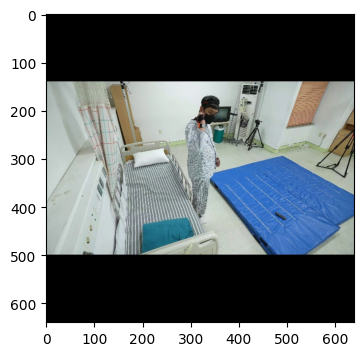

In [25]:
%matplotlib inline
plt.figure(figsize=(5, 4))
plt.imshow(img_src)
plt.show()


0: 224x224 1 Normal, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 3.0ms postprocess per image at shape (1, 3, 224, 224)


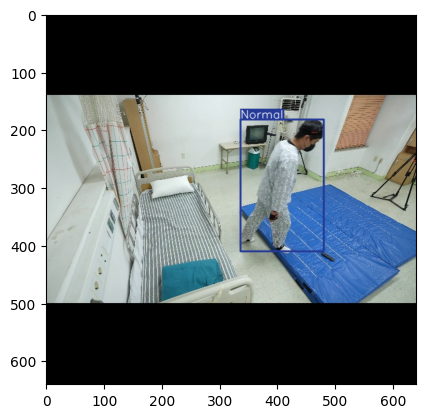

In [26]:
%matplotlib inline
num_head = 0
test_img = cv2.imread(test_file_list[3])
img_src = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
result = model(img_src)[0]

annotator = Annotator(img_src)
boxes = result.boxes

for box in boxes:
    b = box.xyxy[0]
    cls = box.cls
    annotator.box_label(b, model.names[int(cls)], color_dict[int(cls)])
img_src = annotator.result()

plt.imshow(img_src)
plt.show()

[]
['E:\\project\\New_Data\\test\\images\\02343_H_A_N_C1_I001.jpg', 'E:\\project\\New_Data\\test\\images\\02343_H_A_N_C1_I002.jpg', 'E:\\project\\New_Data\\test\\images\\02343_H_A_N_C1_I003.jpg', 'E:\\project\\New_Data\\test\\images\\02343_H_A_N_C1_I004.jpg', 'E:\\project\\New_Data\\test\\images\\02343_H_A_N_C1_I005.jpg', 'E:\\project\\New_Data\\test\\images\\02343_H_A_N_C1_I006.jpg', 'E:\\project\\New_Data\\test\\images\\02343_H_A_N_C1_I007.jpg', 'E:\\project\\New_Data\\test\\images\\02343_H_A_N_C1_I008.jpg', 'E:\\project\\New_Data\\test\\images\\02343_H_A_N_C1_I009.jpg', 'E:\\project\\New_Data\\test\\images\\02343_H_A_N_C1_I010.jpg', 'E:\\project\\New_Data\\test\\images\\02343_H_A_N_C2_I001.jpg', 'E:\\project\\New_Data\\test\\images\\02343_H_A_N_C2_I002.jpg', 'E:\\project\\New_Data\\test\\images\\02343_H_A_N_C2_I003.jpg', 'E:\\project\\New_Data\\test\\images\\02343_H_A_N_C2_I004.jpg', 'E:\\project\\New_Data\\test\\images\\02343_H_A_N_C2_I005.jpg', 'E:\\project\\New_Data\\test\\images

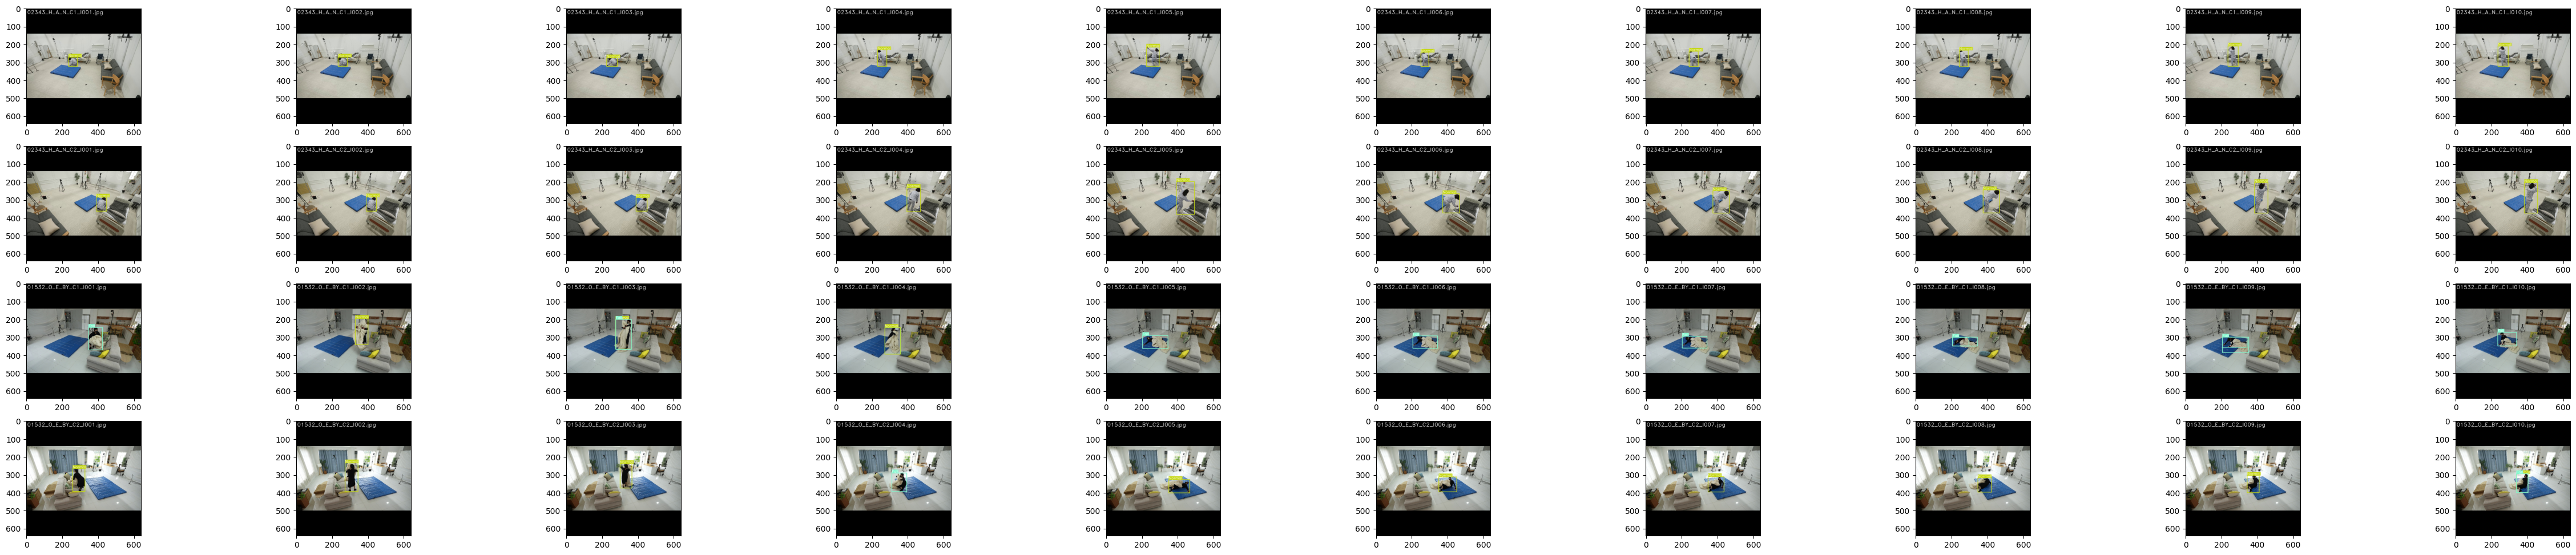

In [11]:
%matplotlib inline
plt.figure(figsize=(60, 12))

test_file_root = {}
test_idx_list = {}
test_file_list = {'Normal': [], 'Fall': []}
test_file_root = {'Normal': glob.glob(f'{test_root}\\images\\*_N_*'), 'Fall': glob.glob(f'{test_root}\\images\\*_?Y_*')}
print(test_file_list['Fall'])

for cls in cls_list:
    test_idx_list[cls] = list(set([x.split('\\')[-1].split('_')[0] for x in test_file_root[cls]]))
    random.shuffle(test_idx_list[cls])
    for test_idx in test_idx_list[cls]:
        test_file_list[cls].extend(sorted(glob.glob(f'{test_root}\\images\\{test_idx}_*'), key=lambda dir: dir.replace('.jpg', '')))
    print(test_file_list[cls])
# print(test_file_list)
cnt = 0
for cls_ in cls_list:
    for idx in range(20):
        num_head = 0
        test_img = cv2.imread(test_file_list[cls_][idx])
        img_src = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
        result = model(img_src)[0]

        annotator = Annotator(img_src)
        boxes = result.boxes

        for box in boxes:
            b = box.xyxy[0]
            cls = box.cls
            annotator.box_label(b, model.names[int(cls)], color_dict[int(cls)])
        cv2.putText(img_src, test_file_list[cls_][idx].split('\\')[-1], (5, 30), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 255, 255), lineType=cv2.LINE_AA)
        img_src = annotator.result()
        cnt += 1
        plt.subplot(4, 10, cnt)

        plt.imshow(img_src)
plt.show()